In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.image import imread

There's a couple of helper scripts `split_video`, `show_images` for splitting the video into individual frames, and to display images in rows and columns

In [3]:
#local imports

from split_frames import split_video
from plot_help    import show_images

In [4]:
src_name = 'tdk-bankrobbery'

# Use PySceneDetect to extract delta HSL (delta) values from each frame and save to csv
!scenedetect -i {src_name}.mp4 -s {src_name}.csv detect-content list-scenes

In [5]:
split_video(filename='tdk-bankrobbery.mp4', path='frames')
path_frames = "./frames"

Frame Rate = 23.976024651015454
Created 7097 frames


In [6]:
# Read in the raw frame-by-frame data created by PySceneDetect
raw_data = pd.read_csv("tdk-bankrobbery-stats.csv", low_memory = False, skiprows = 1)
raw_data.head()


Frame Number      Timecode  content_val  delta_hue  delta_lum  delta_sat
0             1  00:00:00.042     7.875524   6.514187   7.492296   9.620090
1             2  00:00:00.083     6.751998   6.101535   5.829074   8.325385
2             3  00:00:00.125     8.437012   7.547390   7.758870  10.004774
3             4  00:00:00.167     8.767886   8.189345   7.991591  10.122721
4             5  00:00:00.209     7.997215   6.814317   7.709418   9.467909

In [7]:
# Read in the shot-list that PySceneDetect created. This is PySceneDetect's analysis of where the (hard) cut occurs.
shotlist_psd = pd.read_csv('tdk-bankrobbery-Scenes.csv', skiprows = 1)
shotlist_psd.head()

Scene Number  Start Frame Start Timecode  Start Time (seconds)  End Frame  \
0             1            0   00:00:00.000                 0.000        256   
1             2          256   00:00:10.677                10.677        318   
2             3          318   00:00:13.263                13.263        341   
3             4          341   00:00:14.223                14.223        397   
4             5          397   00:00:16.558                16.558        414   

   End Timecode  End Time (seconds)  Length (frames) Length (timecode)  \
0  00:00:10.677              10.677              256      00:00:10.677   
1  00:00:13.263              13.263               62      00:00:02.586   
2  00:00:14.223              14.223               23      00:00:00.959   
3  00:00:16.558              16.558               56      00:00:02.336   
4  00:00:17.267              17.267               17      00:00:00.709   

   Length (seconds)  
0            10.677  
1             2.586  
2             0.959  
3             2.336  
4             0.709

In [8]:
# flatten list of lists into single list
flatten = lambda x: list(itertools.chain.from_iterable(x))

def get_surrounding_frames(frames, pre = 5, post = 5):
    return flatten([np.arange(frame-pre, frame+post+1) for frame in frames])

def view_surrounding_frames(frame, pre = 5, post = 5):
    frame_ = get_surrounding_frames(frame, pre, post)
    images = [imread(f'{path_frames}/frame{i}.jpg') for i in frame_]
    titles = [f'Frame {i}' for i in frame_]
    show_images(images, 4, titles)
    
def view_plot(frame, pre = 5, post = 5):
    frame_ = get_surrounding_frames(frame, pre, post)
    subset = raw_data[raw_data['Frame Number'].isin(frame_)]
    plt.figure(figsize = (8, 6))
    plt.xlabel('Frame Number')
    plt.ylabel('Average HSL Value')
    plt.bar(subset['Frame Number'], subset['content_val'])
    
def inspect_frame(frame, pre = 5, post = 5):
    view_plot(frame, pre*2, post*2)
    view_surrounding_frames(frame, pre, post)
    

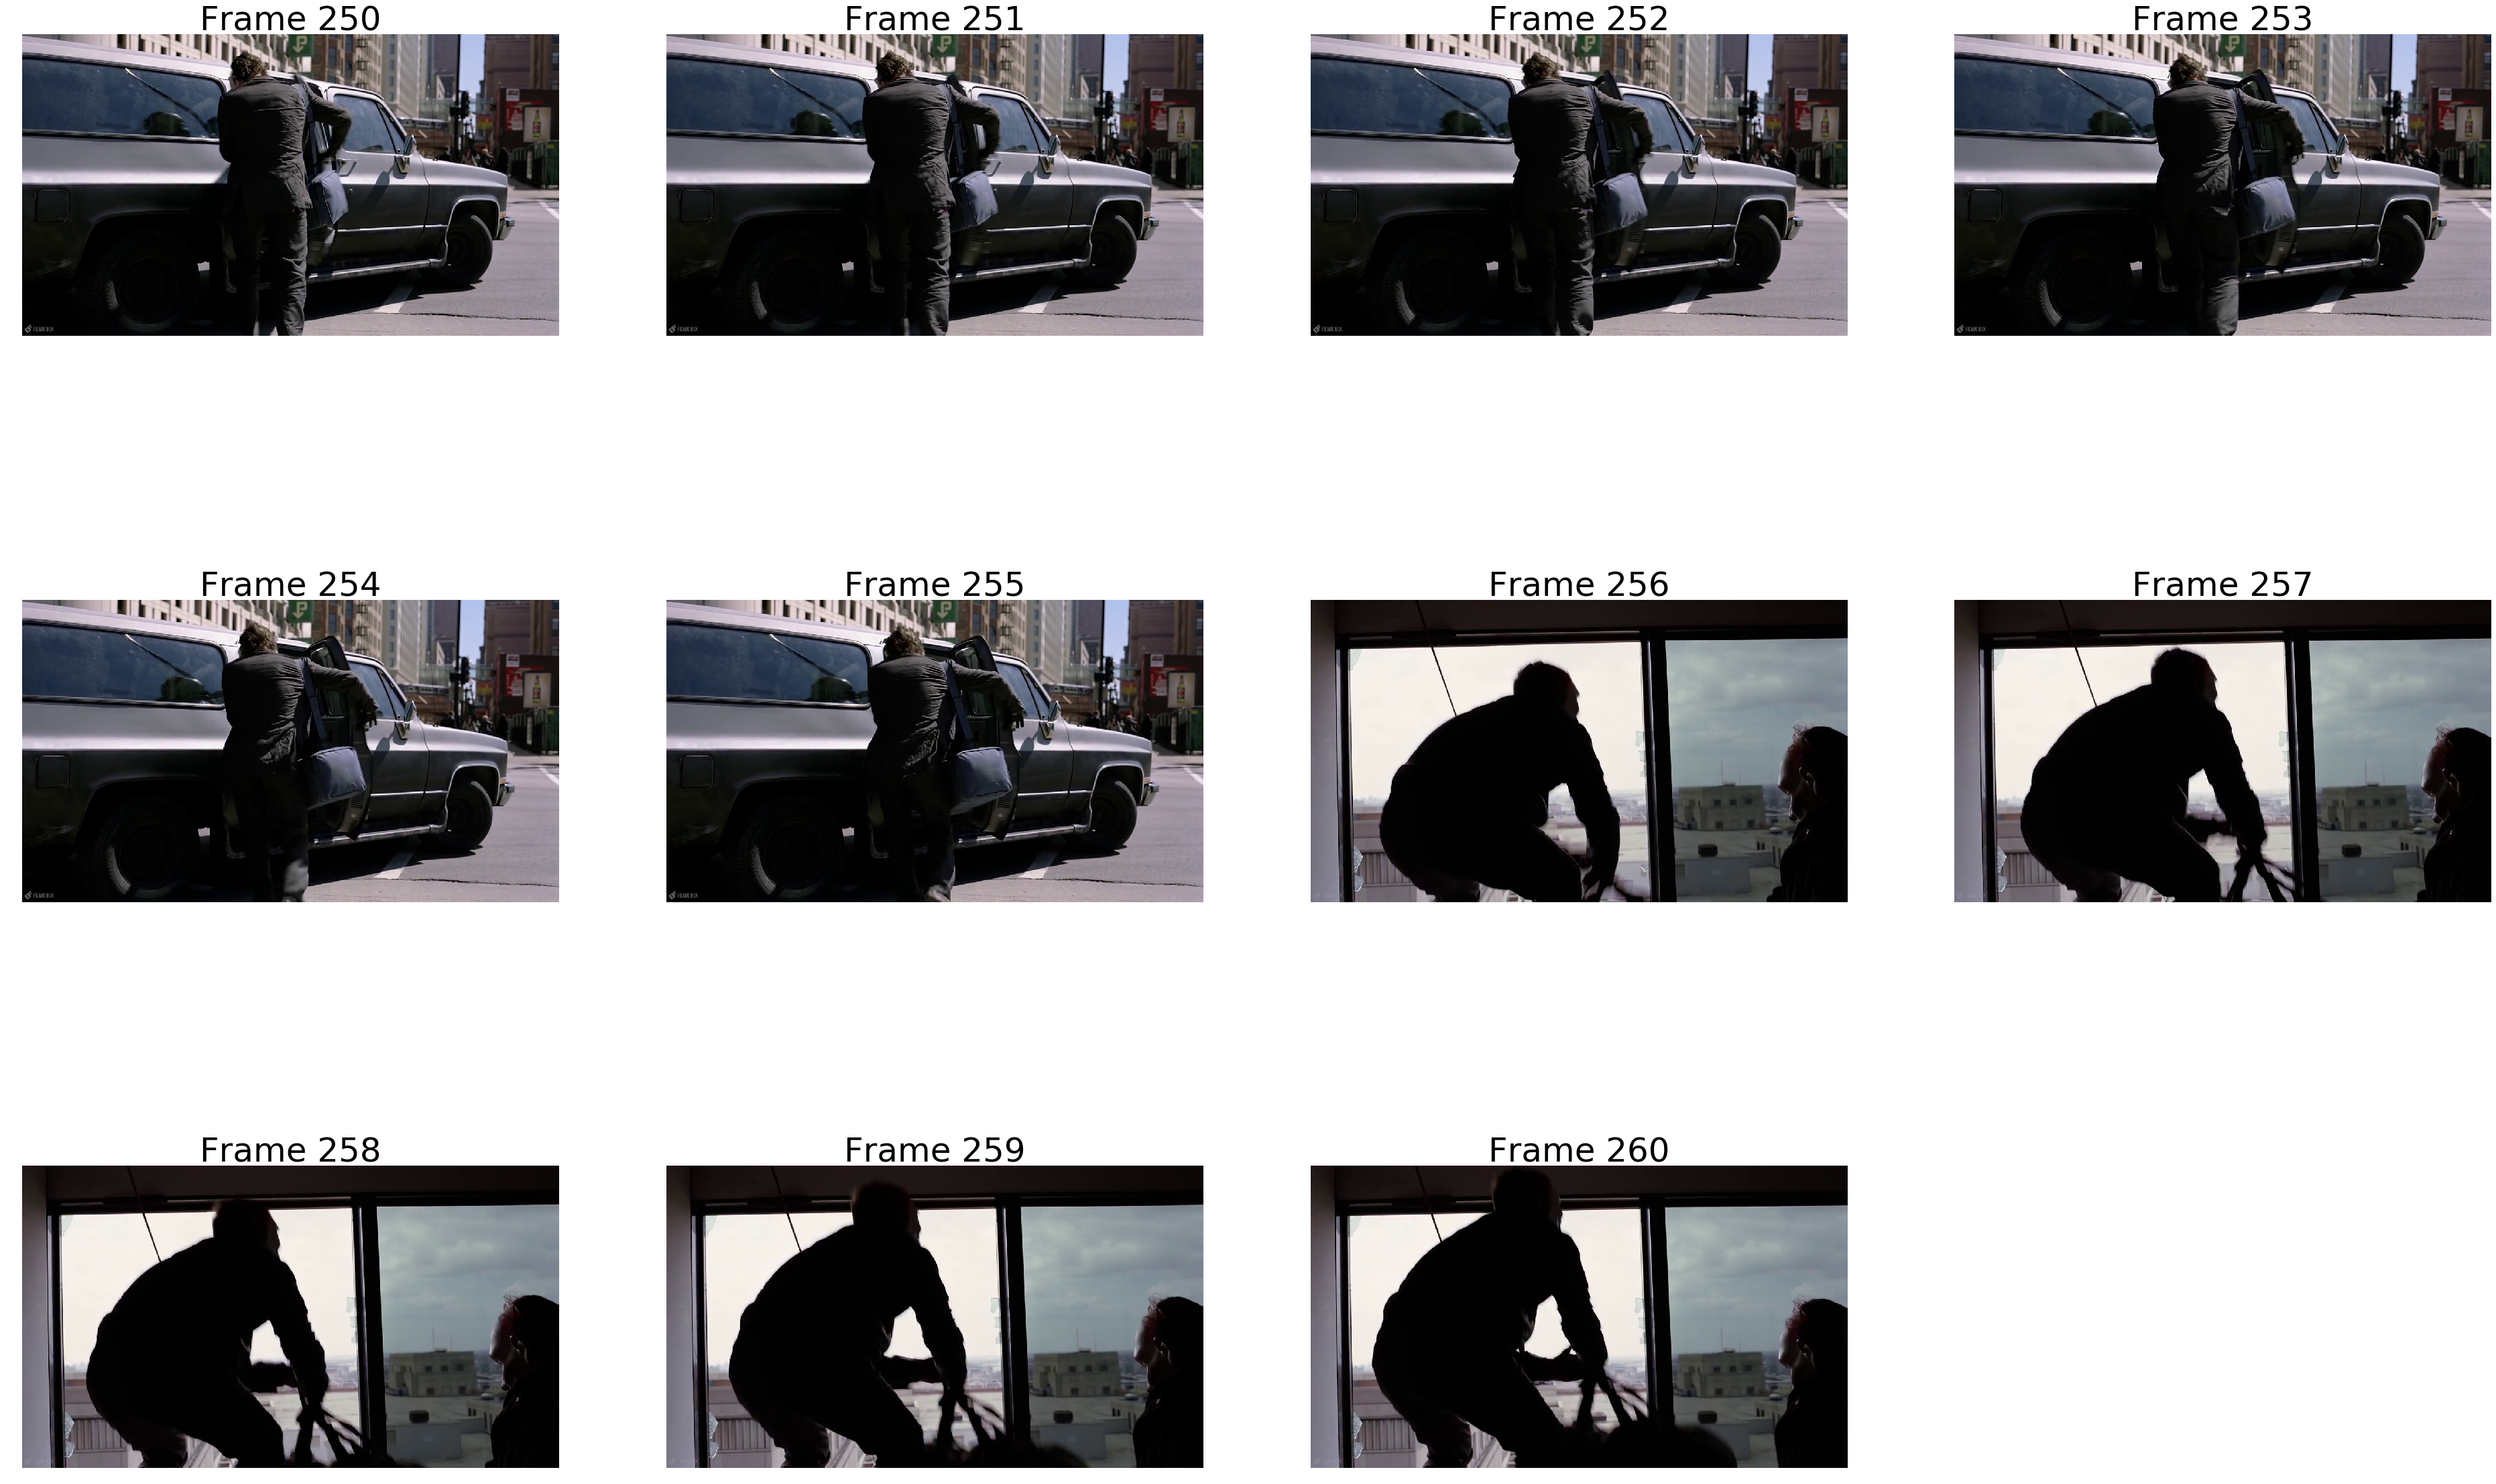

In [9]:
view_surrounding_frames([255], 5, 5)

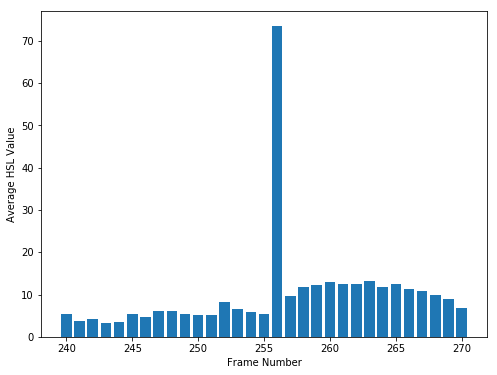

In [10]:
view_plot([255], 15, 15)

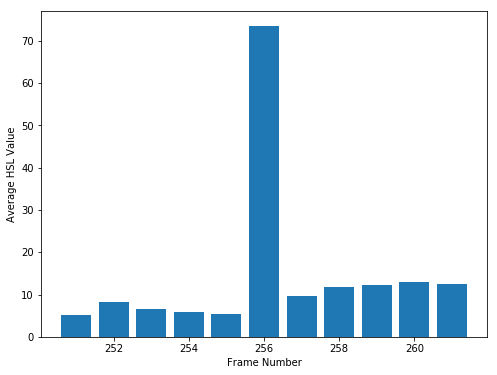

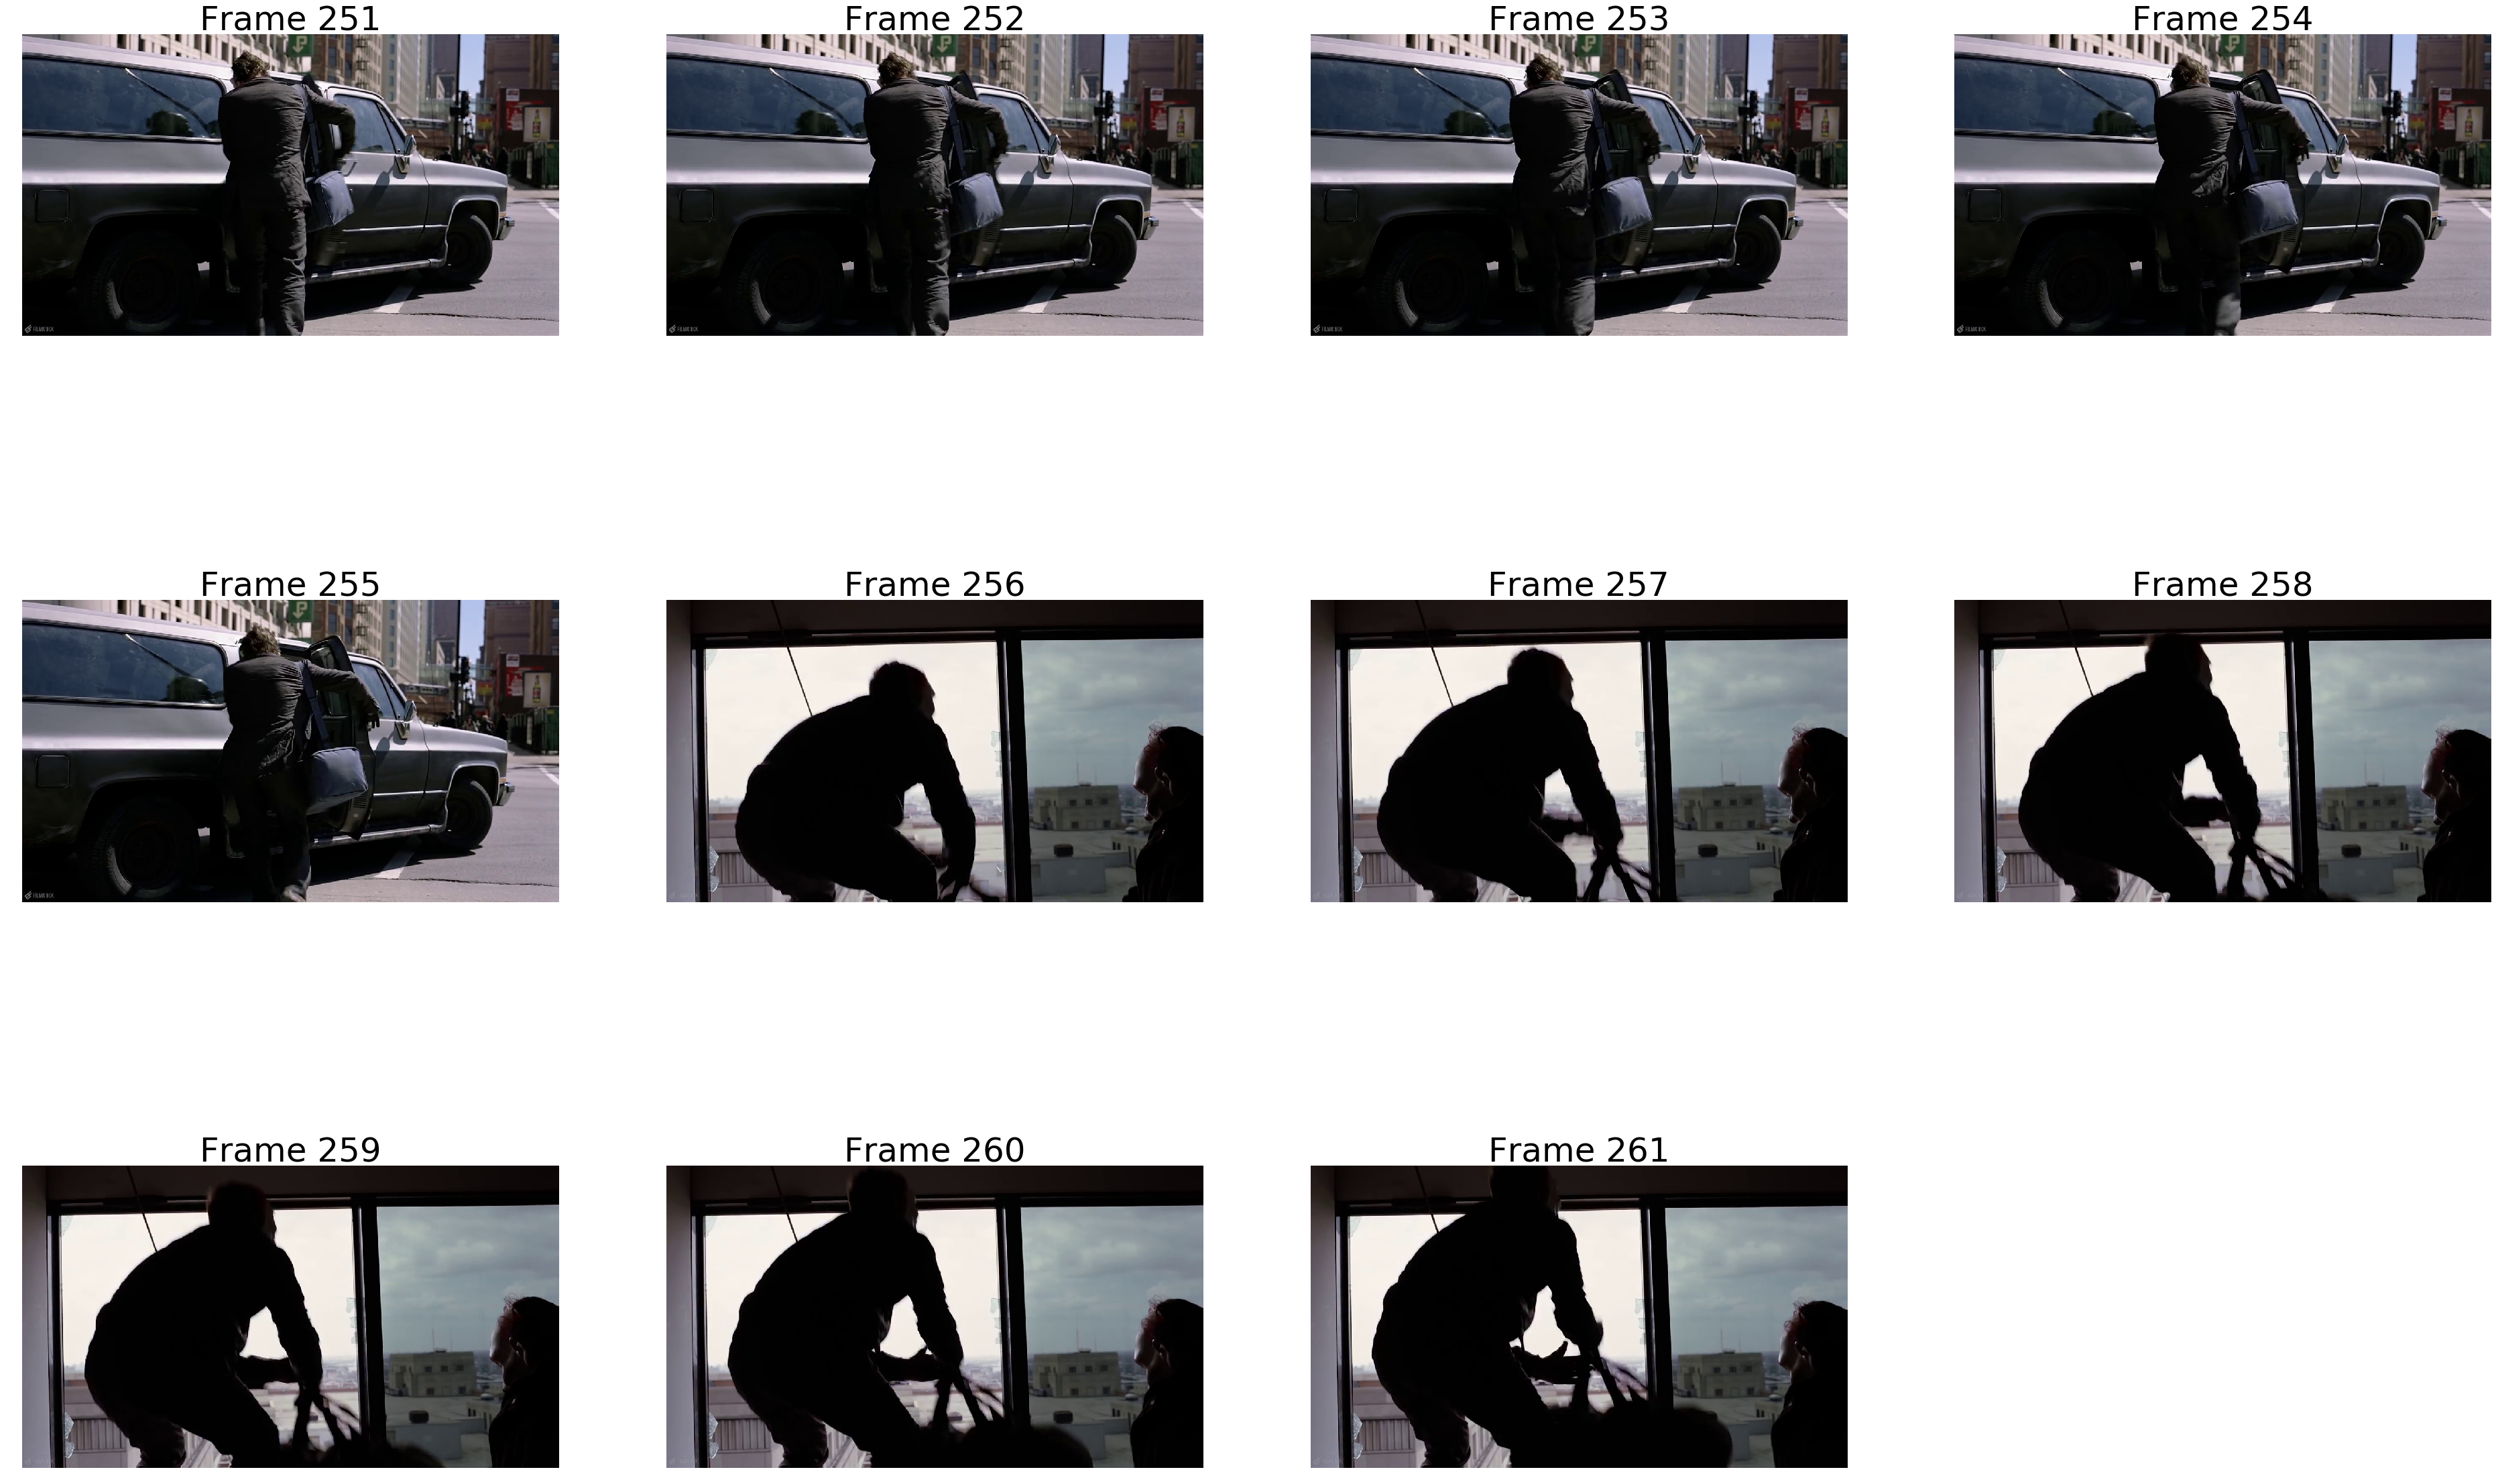

In [258]:
inspect_frame([256])